<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-datasets" data-toc-modified-id="Load-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load datasets</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#'beef_df'-preprocessing" data-toc-modified-id="'beef_df'-preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>'beef_df' preprocessing</a></span></li><li><span><a href="#'pork_df'-preprocessing" data-toc-modified-id="'pork_df'-preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>'pork_df' preprocessing</a></span></li><li><span><a href="#'sales'-preprocessing" data-toc-modified-id="'sales'-preprocessing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>'sales' preprocessing</a></span></li><li><span><a href="#Merge-datasets" data-toc-modified-id="Merge-datasets-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Merge datasets</a></span></li></ul></li><li><span><a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check missing values</a></span><ul class="toc-item"><li><span><a href="#결측치가-존재하는-변수별로-일일이-조회해서-어떤-대체값을-선정할지-고안" data-toc-modified-id="결측치가-존재하는-변수별로-일일이-조회해서-어떤-대체값을-선정할지-고안-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>결측치가 존재하는 변수별로 일일이 조회해서 어떤 대체값을 선정할지 고안</a></span><ul class="toc-item"><li><span><a href="#결측치가-매우-많은-1시간최다강수량,-일강수량-변수들-살펴보기" data-toc-modified-id="결측치가-매우-많은-1시간최다강수량,-일강수량-변수들-살펴보기-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>결측치가 매우 많은 1시간최다강수량, 일강수량 변수들 살펴보기</a></span></li><li><span><a href="#날씨-변수들끼리-상관관계-살펴보기" data-toc-modified-id="날씨-변수들끼리-상관관계-살펴보기-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>날씨 변수들끼리 상관관계 살펴보기</a></span></li><li><span><a href="#결측치-변수마다-KNN-imputation-적용해서-결측치-대체한-후-unique한-변수들로-데이터프레임-형성" data-toc-modified-id="결측치-변수마다-KNN-imputation-적용해서-결측치-대체한-후-unique한-변수들로-데이터프레임-형성-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>결측치 변수마다 KNN imputation 적용해서 결측치 대체한 후 unique한 변수들로 데이터프레임 형성</a></span></li><li><span><a href="#결측치-대체된-데이터-원본-데이터에-병합" data-toc-modified-id="결측치-대체된-데이터-원본-데이터에-병합-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>결측치 대체된 데이터 원본 데이터에 병합</a></span></li></ul></li></ul></li><li><span><a href="#공휴일-부근-날짜에-가중치-부여하기" data-toc-modified-id="공휴일-부근-날짜에-가중치-부여하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>공휴일 부근 날짜에 가중치 부여하기</a></span></li><li><span><a href="#결측치-대체한-데이터-&amp;-공휴일-파생변수-생성한-데이터-병합-후-최종-데이터셋" data-toc-modified-id="결측치-대체한-데이터-&amp;-공휴일-파생변수-생성한-데이터-병합-후-최종-데이터셋-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>결측치 대체한 데이터 &amp; 공휴일 파생변수 생성한 데이터 병합 후 최종 데이터셋</a></span></li><li><span><a href="#데이터-EDA" data-toc-modified-id="데이터-EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>데이터 EDA</a></span></li></ul></div>

# Load datasets

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data/woochuri/')

In [2]:
# 우추리 일별 매출 데이터
sales = pd.read_excel('./woochuri_sales.xlsx')
sales['datetime'] = pd.Series(pd.date_range(start='2013-01-07',
                                           end='2020-12-31',
                                           freq='D'))
cols = ['datetime', 'sales', 'remark']
sales = sales[cols]
sales = sales.rename(columns={'datetime':'날짜', 'sales':'일매출'})

# 일별 날씨 데이터 
weather = pd.read_csv('past_weather.csv', index_col=[0])
weather['시간'] = pd.to_datetime(weather['시간'])

In [3]:
# 소, 돼지 지역별 가격 데이터 각각 로드
import pymysql
db = pymysql.connect(host='localhost', user='younghun',
                    password='watson1259', db='beef_pork_db',
                    charset='utf8')
cursor = db.cursor()

beef_sql = "SELECT * FROM beef_prices"
pork_sql = "SELECT * FROM pork_prices"

beef_df = pd.read_sql(beef_sql, db)
pork_df = pd.read_sql(pork_sql, db)

beef_df.shape, pork_df.shape

((14647, 5), (12619, 5))

- 지역별 가격 중 한우, 육우별로 수도권/중부권/전국 지역 중 어떤 것을 선택할지 도메인 지식 전문가에게 물어보기

# Data preprocessing

## 'beef_df' preprocessing
- 소 지역별 가격 데이터
- 요일별로 나누어야 함
- 주의해야 할 점
    * 주말(토, 일)같은 경우는 빠져 있음
        * 그러므로 금요일 가격으로 대체하는 것이 좋을듯!
    * 지역값이 칼럼으로 가도록 Pivot 시키기

In [4]:
# 대전은 중부권이기 떄문에 중부권 가격만 추출
beef_df = beef_df[beef_df['지역'] == '중부권']
hanwoo_df = beef_df[beef_df['종류'] == '한우']
yukwoo_df = beef_df[beef_df['종류'] == '육우']

hanwoo_df = hanwoo_df.rename(columns={'종류': '한우', '가격': '한우가격'})
yukwoo_df = yukwoo_df.rename(columns={'종류': '육우', '가격': '육우가격'})
common_cols = ['날짜', '동물', '지역']
beef_df = hanwoo_df.merge(yukwoo_df, how='inner', on=common_cols)
print('중복 제거하기 전 shape:', beef_df.shape)
unique_beef_df = beef_df.drop_duplicates()
print('중족 제거 후 shape:', unique_beef_df.shape)

중복 제거하기 전 shape: (3493, 7)
중족 제거 후 shape: (1907, 7)


In [5]:
raw_date_df = pd.DataFrame(pd.date_range(start='2013-01-07', end='2020-12-31', freq='D'))
raw_date_df = raw_date_df.rename(columns={0: '날짜'})
merge_beef_df = raw_date_df.merge(unique_beef_df, how='left', on='날짜')
# 데이터가 없는 날짜는 직전 날의 가격으로 대체
merge_beef_df = merge_beef_df.fillna(method='ffill')

## 'pork_df' preprocessing

In [6]:
# 도메인 지식 상 시중에 판매되는 돼지고기 중 96.2%가 돼지 탕박임 -> 따라서 돼지 박피 데이터는 제거
# 또한 대전은 중부권이긴 하지만 지역의 종류에는 수도권, 영남권, 전국 밖에 없으므로 전국 값만 추출
cond_tang = pork_df['종류'] == '탕박'
cond_n = pork_df['지역'] == '전국'
pork_df = pork_df[(cond_tang)&(cond_n)]
pork_df = pork_df.drop_duplicates()

In [7]:
# 원래 범위의 날짜로 이루어진 데이터 프레임 만들고 이를 기준으로 left join 시키기
raw_date_df = pd.DataFrame(pd.date_range(start='2013-01-07', end='2020-12-31', freq='D'))
raw_date_df = raw_date_df.rename(columns={0: '날짜'})
merge_pork_df = raw_date_df.merge(pork_df, how='left', on='날짜')
merge_pork_df = merge_pork_df.fillna(method='ffill')
merge_pork_df = merge_pork_df.rename(columns={'가격': '돼지탕박가격'})

In [8]:
print('소 가격 데이터 shape:', merge_beef_df.shape)
print('돼지 가격 데이터 shape:', merge_pork_df.shape)
print(len(pd.date_range(start='2013-01-07', end='2020-12-31', freq='D')))

소 가격 데이터 shape: (2916, 7)
돼지 가격 데이터 shape: (2916, 5)
2916


In [9]:
# 한우, 육우, 돼지탕박 일자별 가격 병합한 데이터셋 만들기
merge_df = merge_beef_df.merge(merge_pork_df, how='inner', on='날짜')
columns = ['날짜', '한우가격', '육우가격', '돼지탕박가격']
beef_pork_df = merge_df[columns]
print('한우&육우&돼지탕박 일자별 가격 데이터프레임 shape:', beef_pork_df.shape)
beef_pork_df.head()

한우&육우&돼지탕박 일자별 가격 데이터프레임 shape: (2916, 4)


,날짜,한우가격,육우가격,돼지탕박가격
0,2013-01-07,14548.0,9169.0,3140.0
1,2013-01-08,15082.0,8105.0,3024.0
2,2013-01-09,15030.0,9669.0,3096.0
3,2013-01-10,15229.0,9674.0,3000.0
4,2013-01-11,14920.0,8286.0,2963.0


## 'sales' preprocessing

In [10]:
# remark의 결측치값은 모두 평일로 대체
sales['remark'] = sales['remark'].fillna('평일')

In [11]:
import holidays
from datetime import date
kor_holidays = holidays.Korea(years=[d for d in range(2013, 2021)])

holidays_dates = []
holidays_names = []
for date, name in kor_holidays.items():
    holidays_dates.append(date)
    holidays_names.append(name)
# 2013년 1월 7일부터이기 때문에 2013년 1월 7일 이전 공휴일은 설날 밖에없기 때문에 가장 첫 번째 요소 제거
holidays_df = pd.DataFrame({'공휴일날짜': holidays_dates,
                            '공휴일명': holidays_names}).sort_values(by='공휴일날짜')
holidays_df['공휴일날짜'] = pd.to_datetime(holidays_df['공휴일날짜'])

# sales(매출) 데이터로 날짜 기준으로 outer join 시키기
# 병합시킬 때 공휴일 데이터프레임 가장 첫 번째 행은 제외. 왜냐하면 2013년 1월 7일부터 데이터가 시작이기 때문!
sales_holiday_df = sales.merge(holidays_df.iloc[1:], how='outer', left_on='날짜', right_on='공휴일날짜')

## Merge datasets
- 우추리 매출 데이터
- 일자별 공휴일 데이터
- 일자별 날씨 데이터
- 일자별 한우/육우(중부권), 돼지탕박(전국) 가격 데이터

In [12]:
sales_holiday_beef_pork = sales_holiday_df.merge(beef_pork_df, how='inner', on='날짜')
dataset = sales_holiday_beef_pork.merge(weather, how='inner', left_on='날짜', right_on='시간')

In [13]:
columns = dataset.columns.tolist()
columns.remove('시간')
dataset = dataset[columns]

---

# Check missing values

In [14]:
dataset.isnull().sum()

날짜             0
일매출            0
remark         0
공휴일날짜       2780
공휴일명        2780
한우가격           0
육우가격           0
돼지탕박가격         0
지역             0
평균기온           0
최저기온           0
최고기온           0
1시간최다강수량    2202
일강수량        1733
평균풍속           2
최대풍속           0
평균상대습도         1
최소상대습도         0
1시간최다일사량       7
일사량            7
dtype: int64

## 결측치가 존재하는 변수별로 일일이 조회해서 어떤 대체값을 선정할지 고안

### 결측치가 매우 많은 1시간최다강수량, 일강수량 변수들 살펴보기

In [15]:
cond = (dataset['1시간최다강수량'].isnull()) | (dataset['일강수량'].isnull())
miss_rain = dataset[cond]
miss_rain.head(50)

,날짜,일매출,remark,공휴일날짜,공휴일명,한우가격,육우가격,돼지탕박가격,지역,평균기온,최저기온,최고기온,1시간최다강수량,일강수량,평균풍속,최대풍속,평균상대습도,최소상대습도,1시간최다일사량,일사량
0,2013-01-07,422400,평일,NaT,NaN,14548.0,9169.0,3140.0,대전,-5.0,-10.7,1.0,NaN,NaN,1.0,2.7,66.4,32,2.06,10.99
1,2013-01-08,461900,평일,NaT,NaN,15082.0,8105.0,3024.0,대전,-4.2,-9.2,1.9,NaN,NaN,1.1,3.0,68.0,43,1.87,11.16
2,2013-01-09,492500,평일,NaT,NaN,15030.0,9669.0,3096.0,대전,-6.3,-9.7,-1.9,NaN,NaN,1.9,5.2,59.5,39,2.13,12.34
3,2013-01-10,701300,평일,NaT,NaN,15229.0,9674.0,3000.0,대전,-7.9,-13.8,-1.5,NaN,NaN,1.1,3.1,54.9,29,2.15,12.69
4,2013-01-11,1035000,평일,NaT,NaN,14920.0,8286.0,2963.0,대전,-5.3,-12.8,1.9,NaN,NaN,0.9,1.9,70.0,50,1.99,11.05
5,2013-01-12,1168600,평일,NaT,NaN,14920.0,8286.0,2985.0,대전,0.0,-5.9,6.6,NaN,NaN,1.1,3.2,80.4,61,1.47,8.72
6,2013-01-13,696000,평일,NaT,NaN,14920.0,8286.0,2985.0,대전,-0.8,-3.5,2.8,NaN,NaN,0.8,2.4,84.3,62,0.93,4.91
7,2013-01-14,542000,평일,NaT,NaN,14028.0,9354.0,2963.0,대전,-1.6,-6.6,4.4,NaN,NaN,1.2,4.4,75.5,56,1.76,7.86
8,2013-01-15,503500,평일,NaT,NaN,14610.0,8777.0,3076.0,대전,-2.2,-7.6,4.0,NaN,NaN,0.9,2.3,73.4,42,1.69,10.31
9,2013-01-16,360500,평일,NaT,NaN,14769.0,9829.0,3017.0,대전,-2.1,-6.0,1.5,NaN,0.3,1.2,4.0,83.3,70,0.92,4.25


- 데이터를 살펴보니 1시간 최다강수량은 결측치가 매우 많기도 하며 일강수량 변수와 추후에 다중공선성이 있을 가능성이 매우 높기 때문에 **1시간최다강수량 변수는 삭제**

In [16]:
dataset = dataset.drop(['1시간최다강수량'], axis=1)

- 일강수량 결측치는 비가 오지 않은 즉 ``0.0``과 동일하기 때문에 모두 0으로 대체

In [17]:
dataset['일강수량'] = dataset['일강수량'].fillna(0.0)

### 날씨 변수들끼리 상관관계 살펴보기

- 결측치가 존재하는 변수는 주로 날씨 변수들에 소속되어 있음. 그러므로 날씨 변수들끼리 상관관계를 확인해보자.

In [18]:
dataset.isnull().sum()

날짜             0
일매출            0
remark         0
공휴일날짜       2780
공휴일명        2780
한우가격           0
육우가격           0
돼지탕박가격         0
지역             0
평균기온           0
최저기온           0
최고기온           0
일강수량           0
평균풍속           2
최대풍속           0
평균상대습도         1
최소상대습도         0
1시간최다일사량       7
일사량            7
dtype: int64

<AxesSubplot:>

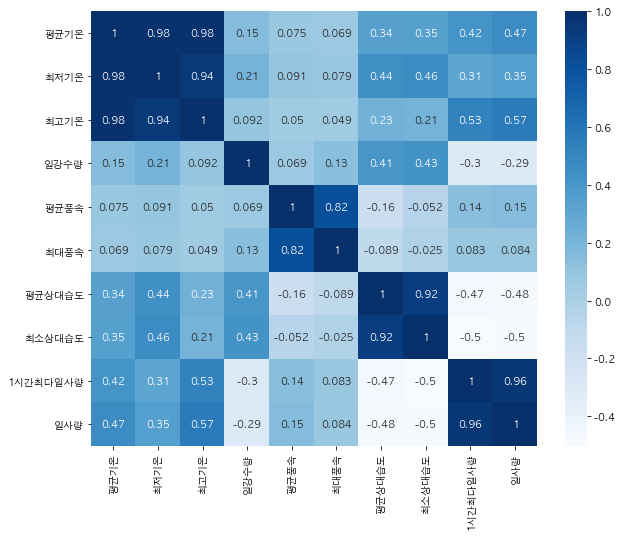

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

weather_df = dataset[dataset.columns.tolist()[9:]]
corr_weather = weather_df.corr()
mask = np.triu(np.ones_like(corr_weather, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_weather, cmap='Blues', annot=True)

- 결측치가 존재하는 변수들(공휴일 변수 2개 제외) 각각 상관관계가 높은 변수들 정의
    * 평균풍속(2개)
        - 최대풍속(0.82)
    * 평균상대습도(1개)
        - 최소상대습도(0.92), 최저기온(0.44), 일강수량(0.41), 평균기온(0.34), 최고기온(0.23)
    * 1시간최다일사량(7개)
        - 최고기온(0.53), 평균기온(0.47), 최저기온(0.31), 최소상대습도(-0.5)
    * 일사량(7개)
        - 최고기온(0.57), 평균기온(0.47), 최저기온(0.35), 최소상대습도(-0.5)

### 결측치 변수마다 KNN imputation 적용해서 결측치 대체한 후 unique한 변수들로 데이터프레임 형성

In [20]:
# 결측치 변수마다 각각 상관관계가 높은 변수들끼리 비지도 학습인 KNN을 수행하여 결측치 대체하기!
# 단, K값이 하이퍼파라미터이기 때문에 최적의 K값을 도출하지 못하는 한계는 존재..
# 우선 디폴트 K값이 5이기 때문에 5로 설정!
from sklearn.impute import KNNImputer

avg_wind = dataset[['평균풍속', '최대풍속']] # 결측치:평균풍속
avg_humid = dataset[['평균상대습도', '최소상대습도', '최저기온', '일강수량', '평균기온', '최고기온']] # 결측치:평균상대습도
max_sun_h = dataset[['1시간최다일사량', '최고기온', '평균기온', '최저기온', '최소상대습도']] # 결측치:1시가최다일사량
max_sun = dataset[['일사량', '최고기온', '평균기온', '최저기온', '최소상대습도']] # 결측치:일사량

knn_datasets = [avg_wind, avg_humid, max_sun_h, max_sun]
after_datasets = []
for data in knn_datasets:
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(data.values)
    after_values = imputer.transform(data.values) # array
    after_dataset = pd.DataFrame(after_values, columns=data.columns)
    after_datasets.append(after_dataset)
# 결측치 채운 데이터 프레임으로 전체 병합 후 distinct한 칼럼들만 추출해서 결측치가 채워진 날씨 변수들로 재탄생!
concat_df = pd.concat([after_datasets[0], after_datasets[1], after_datasets[2], after_datasets[3]], axis=1)

# dataframe boolean 인덱싱은 중복 제거되서 추출되지 않음.
#단, pd.DataFrame으로 데이터프레임을 만들 때 값과 칼럼이 동일한 것들은 자동으로 중복제거되어 만들어짐!
concat_cols = concat_df.columns.tolist()
transform_dict = {}
# 행벡터 -> 열벡터로 만들기 위해서 Transpose 사용
for i, v in enumerate(concat_df.values.T):
    transform_dict[concat_cols[i]] = v
    
transform_df = pd.DataFrame(transform_dict)

In [21]:
transform_df.head()

,평균풍속,최대풍속,평균상대습도,최소상대습도,최저기온,일강수량,평균기온,최고기온,1시간최다일사량,일사량
0,1.0,2.7,66.4,32.0,-10.7,0.0,-5.0,1.0,2.06,10.99
1,1.1,3.0,68.0,43.0,-9.2,0.0,-4.2,1.9,1.87,11.16
2,1.9,5.2,59.5,39.0,-9.7,0.0,-6.3,-1.9,2.13,12.34
3,1.1,3.1,54.9,29.0,-13.8,0.0,-7.9,-1.5,2.15,12.69
4,0.9,1.9,70.0,50.0,-12.8,0.0,-5.3,1.9,1.99,11.05


### 결측치 대체된 데이터 원본 데이터에 병합
- 매출(sales), 공휴일(holiday), 소,돼지 가격(beef, pork) 데이터 병합

In [22]:
standard_cols = set(dataset.columns) - set(transform_df.columns)
dataset = pd.concat([dataset[standard_cols], transform_df], axis=1)
print('결측치 대체 후 데이터 원본과 병합한 shape:', dataset.shape)
dataset.head()

결측치 대체 후 데이터 원본과 병합한 shape: (2916, 19)


,일매출,돼지탕박가격,공휴일날짜,한우가격,지역,remark,육우가격,공휴일명,날짜,평균풍속,최대풍속,평균상대습도,최소상대습도,최저기온,일강수량,평균기온,최고기온,1시간최다일사량,일사량
0,422400,3140.0,NaT,14548.0,대전,평일,9169.0,NaN,2013-01-07,1.0,2.7,66.4,32.0,-10.7,0.0,-5.0,1.0,2.06,10.99
1,461900,3024.0,NaT,15082.0,대전,평일,8105.0,NaN,2013-01-08,1.1,3.0,68.0,43.0,-9.2,0.0,-4.2,1.9,1.87,11.16
2,492500,3096.0,NaT,15030.0,대전,평일,9669.0,NaN,2013-01-09,1.9,5.2,59.5,39.0,-9.7,0.0,-6.3,-1.9,2.13,12.34
3,701300,3000.0,NaT,15229.0,대전,평일,9674.0,NaN,2013-01-10,1.1,3.1,54.9,29.0,-13.8,0.0,-7.9,-1.5,2.15,12.69
4,1035000,2963.0,NaT,14920.0,대전,평일,8286.0,NaN,2013-01-11,0.9,1.9,70.0,50.0,-12.8,0.0,-5.3,1.9,1.99,11.05


---

# 공휴일 부근 날짜에 가중치 부여하기

In [24]:
pd.options.display.max_rows = 100
dataset.head()

,일매출,돼지탕박가격,공휴일날짜,한우가격,지역,remark,육우가격,공휴일명,날짜,평균풍속,최대풍속,평균상대습도,최소상대습도,최저기온,일강수량,평균기온,최고기온,1시간최다일사량,일사량
0,422400,3140.0,NaT,14548.0,대전,평일,9169.0,NaN,2013-01-07,1.0,2.7,66.4,32.0,-10.7,0.0,-5.0,1.0,2.06,10.99
1,461900,3024.0,NaT,15082.0,대전,평일,8105.0,NaN,2013-01-08,1.1,3.0,68.0,43.0,-9.2,0.0,-4.2,1.9,1.87,11.16
2,492500,3096.0,NaT,15030.0,대전,평일,9669.0,NaN,2013-01-09,1.9,5.2,59.5,39.0,-9.7,0.0,-6.3,-1.9,2.13,12.34
3,701300,3000.0,NaT,15229.0,대전,평일,9674.0,NaN,2013-01-10,1.1,3.1,54.9,29.0,-13.8,0.0,-7.9,-1.5,2.15,12.69
4,1035000,2963.0,NaT,14920.0,대전,평일,8286.0,NaN,2013-01-11,0.9,1.9,70.0,50.0,-12.8,0.0,-5.3,1.9,1.99,11.05


In [147]:
# 공휴일 관련 변수들만 추출
hol_cols = ['날짜', '일매출', 'remark', '공휴일날짜', '공휴일명']
holidays = dataset[hol_cols]

In [148]:
holidays['요일'] = holidays['날짜'].dt.day_name()
hol_cols = ['날짜', '요일','일매출', 'remark', '공휴일날짜', '공휴일명']
holidays = holidays[hol_cols]

- 우선 명절을 기준으로 몇일 전부터 매출이 많이 상승하는지 알아봐야 한다.
    * 먼저 명절이 있는 날짜를 리스트에 담기
    * 그리고 그 리스트의 날짜들 직전의 7일치까지의 데이터 Indexing을 리스트로 담기
    * 해당 데이터들 출력해서 확인해보기

In [149]:
# 공휴일인 날짜들이 담겨있는 index 추출
from itertools import chain # for flattening 2d list

holidays_dates = holidays[~holidays['공휴일날짜'].isnull()]['날짜'].dt.strftime('%Y-%m-%d').values
holidays_arounds = []
for date in holidays_dates:
    around = pd.date_range(end=date, freq='D', periods=6)
    holidays_arounds.append(around)
holidays_arounds = list(chain.from_iterable(holidays_arounds))
holidays_arounds_df = holidays.loc[holidays['날짜'].isin(holidays_arounds)]

In [ ]:
pd.options.display.max_rows = 500
holidays_arounds_df.head(500)

- 우선 설날 당일 이전 날(The day preceding of Lunar New Year's Da) 또는 추석 당일 이전 날(The day preceding of Chuseok) 포함 직전까지 1,2,3,4,5,6으로 가중치 부여
- 추석(Chuseok), 설날(Lunar) 키워드가 들어가지 않은 공휴일들은 공휴일 당일에 가중치 부여(공휴일이면 1 아니면 0)

In [151]:
lunar_chuseok = ["The day preceding of Lunar New Year's Day", "The day preceding of Chuseok"]
lunar_chuseok_dates = holidays[holidays['공휴일명'].isin(lunar_chuseok)]['날짜'].dt.strftime('%Y-%m-%d').values
lunar_chuseok_around_dates = []
for date in lunar_chuseok_dates:
    around = pd.date_range(end=date, freq='D', periods=6)
    lunar_chuseok_around_dates.append(around)
lunar_chuseok_arounds = list(chain.from_iterable(lunar_chuseok_around_dates))

In [152]:
lunar_chuseok_dict = {}
weight = 0
for around_date in lunar_chuseok_arounds:
    weight += 1
    if weight > 6:
        weight = 1
    lunar_chuseok_dict[around_date] = weight

In [153]:
# 추석, 설날 주변 날짜에 가중치 부여하는 함수 정의
def holidays_weights(df):
    df['설_추석_가중치'] = 0
    df['일반공휴일가중치'] = 0
    # 추석, 설날 주변 날짜에 가중치 부여
    if df['날짜'] in list(lunar_chuseok_dict.keys()):
        df['설_추석_가중치'] = lunar_chuseok_dict[df['날짜']]
    return df
# 추석, 설날 제외 일반 공휴일 당일에는 가중치 1 나머지 평일은 0을 부여한 파생변수 생성
holidays = holidays.apply(holidays_weights, axis=1)
holidays.loc[(~holidays['공휴일명'].str.contains('Lunar|Chuseok', na=False))&(holidays['공휴일명'].notnull()), '일반공휴일가중치'] = 1

In [155]:
# 필요한 변수들만 추출하기
need_cols = ['날짜', '요일', '일매출', '설_추석_가중치', '일반공휴일가중치']
holidays = holidays[need_cols]

In [156]:
holidays.head(500)

,날짜,요일,일매출,설_추석_가중치,일반공휴일가중치
0,2013-01-07,Monday,422400,0,0
1,2013-01-08,Tuesday,461900,0,0
2,2013-01-09,Wednesday,492500,0,0
3,2013-01-10,Thursday,701300,0,0
4,2013-01-11,Friday,1035000,0,0
5,2013-01-12,Saturday,1168600,0,0
6,2013-01-13,Sunday,696000,0,0
7,2013-01-14,Monday,542000,0,0
8,2013-01-15,Tuesday,503500,0,0
9,2013-01-16,Wednesday,360500,0,0


---

# 결측치 대체한 데이터 & 공휴일 파생변수 생성한 데이터 병합 후 최종 데이터셋

In [162]:
dataset_cols = ['한우가격', '육우가격', '돼지탕박가격', '평균상대습도', '최소상대습도', '평균기온',
               '최고기온', '최저기온', '평균풍속', '최대풍속', '일사량', '1시간최다일사량', '일강수량']
final_dataset = pd.concat([holidays, dataset[dataset_cols]], axis=1)

In [163]:
final_dataset.head()

,날짜,요일,일매출,설_추석_가중치,일반공휴일가중치,한우가격,육우가격,돼지탕박가격,평균상대습도,최소상대습도,평균기온,최고기온,최저기온,평균풍속,최대풍속,일사량,1시간최다일사량,일강수량
0,2013-01-07,Monday,422400,0,0,14548.0,9169.0,3140.0,66.4,32.0,-5.0,1.0,-10.7,1.0,2.7,10.99,2.06,0.0
1,2013-01-08,Tuesday,461900,0,0,15082.0,8105.0,3024.0,68.0,43.0,-4.2,1.9,-9.2,1.1,3.0,11.16,1.87,0.0
2,2013-01-09,Wednesday,492500,0,0,15030.0,9669.0,3096.0,59.5,39.0,-6.3,-1.9,-9.7,1.9,5.2,12.34,2.13,0.0
3,2013-01-10,Thursday,701300,0,0,15229.0,9674.0,3000.0,54.9,29.0,-7.9,-1.5,-13.8,1.1,3.1,12.69,2.15,0.0
4,2013-01-11,Friday,1035000,0,0,14920.0,8286.0,2963.0,70.0,50.0,-5.3,1.9,-12.8,0.9,1.9,11.05,1.99,0.0


---

# 데이터 EDA
- EDA 살펴볼 변수들
    * 일매출
    * 한우, 육우, 돼지탕박 가격
    * 날씨 변수들